In [1]:
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer, f1_score,accuracy_score, cohen_kappa_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_excel("Bankruptcy_data_Final.xlsx")

In [4]:
data
data.info()
data.describe()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1979,0.980000,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,NaN,NaN,NaN,0
1,1980,0.980000,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0
2,1981,0.870000,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0
3,1982,1.130000,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0
4,1983,1.260000,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,2009,1.520923,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92868,2010,1.988495,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,2011,0.923868,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92870,2012,0.787787,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  92872 non-null  int64  
 1   Tobin's Q           92620 non-null  float64
 2   EPS                 92867 non-null  float64
 3   Liquidity           92625 non-null  float64
 4   Profitability       92625 non-null  float64
 5   Productivity        92625 non-null  float64
 6   Leverage Ratio      92846 non-null  float64
 7   Asset Turnover      92625 non-null  float64
 8   Operational Margin  87315 non-null  float64
 9   Return on Equity    92864 non-null  float64
 10  Market Book Ratio   92815 non-null  float64
 11  Assets Growth       86171 non-null  float64
 12  Sales Growth        86171 non-null  float64
 13  Employee Growth     85862 non-null  float64
 14  BK                  92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92872.000000,92620.000000,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,2004.105888,25.369008,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,9.875926,902.818813,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,1979.000000,0.009283,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,1998.000000,1.120000,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,2006.000000,1.540000,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,2012.000000,2.590000,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,2017.000000,194537.670000,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [5]:
data.dtypes
missing_values = data.isnull().sum()
missing_values

Data Year - Fiscal      int64
Tobin's Q             float64
EPS                   float64
Liquidity             float64
Profitability         float64
Productivity          float64
Leverage Ratio        float64
Asset Turnover        float64
Operational Margin    float64
Return on Equity      float64
Market Book Ratio     float64
Assets Growth         float64
Sales Growth          float64
Employee Growth       float64
BK                      int64
dtype: object

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [6]:
#Dropping the first column Year
#data = data.drop(['Data Year - Fiscal'],axis=1)

#Filling na with 0
data = data.fillna(0)

In [7]:
df_bk=data.copy()

In [8]:
#Feature Enginnering ratios
df_bk['ratio1']=df_bk['Liquidity']*df_bk['Profitability']
df_bk['ratio2']=df_bk['Leverage Ratio']*df_bk['Asset Turnover']
df_bk['ratio3']=df_bk['Profitability']*df_bk['Productivity']
df_bk['ratio4']=df_bk['Operational Margin']*df_bk['Asset Turnover']
df_bk['ratio5']=df_bk['Return on Equity']*df_bk['EPS']
df_bk['ratio6']=df_bk['Return on Equity']*df_bk['Operational Margin']

df_bk = df_bk.fillna(0)

In [9]:
#Converting date into categorical
df_bk['Data Year - Fiscal'] = df_bk['Data Year - Fiscal'].astype("category")

In [10]:
#Feature Engineering - Scaling the numerical features
#Scaling Data - Standardization 
#Data is scaled so that all numbers can be viewed at one standard level

#First step - remove "target variable" from data as we do not need to scale target variable
X = df_bk.copy()
X = X.drop(['BK'],axis=1)

#Scaling the numerical features
scaler = StandardScaler()
features = list(X.select_dtypes(include=np.number).columns)
X[features] = scaler.fit_transform(X[features])

#Adding taregt variable purchase back to the scaled data
X['BK']=df_bk['BK']

df_bk=X.copy()
df_bk

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,...,Assets Growth,Sales Growth,Employee Growth,ratio1,ratio2,ratio3,ratio4,ratio5,ratio6,BK
0,1979,-0.026975,0.007306,0.024572,0.043823,0.037659,-0.000059,0.340233,0.036123,0.006416,...,-0.016897,-0.010304,-0.023455,-0.011156,0.011364,-0.015498,0.056851,-0.007071,-0.003789,0
1,1980,-0.026975,0.007229,0.024572,0.043838,0.037380,-0.000138,0.255079,0.036123,0.006359,...,-0.015120,-0.010220,-0.020486,-0.011156,0.009413,-0.015498,0.054971,-0.007071,-0.003789,0
2,1981,-0.027097,0.006728,0.024243,0.043749,0.036264,-0.001245,0.236155,0.036027,0.006104,...,-0.011717,-0.008387,0.018408,-0.011156,0.005915,-0.015498,0.049927,-0.007071,-0.003789,0
3,1982,-0.026808,0.006910,0.023913,0.043764,0.036264,-0.002154,0.160463,0.036075,0.006133,...,-0.017190,-0.010999,-0.030540,-0.011156,0.002430,-0.015498,0.050807,-0.007071,-0.003789,0
4,1983,-0.026664,0.006928,0.024984,0.043749,0.036264,-0.004525,0.117886,0.036075,0.006104,...,-0.013617,-0.009446,-0.019536,-0.011156,-0.003697,-0.015498,0.050001,-0.007071,-0.003789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,2009,-0.026375,0.005909,0.021480,0.042435,0.032444,-4.124286,-0.414746,0.034215,-0.012768,...,-0.017929,-0.013562,-0.029139,-0.011156,-1.310552,-0.015498,0.029870,-0.007071,-0.003737,0
92868,2010,-0.025856,0.005763,0.022380,0.041776,0.030652,-0.023222,-0.395005,0.033088,-0.006826,...,-0.019738,-0.010365,-0.038849,-0.011156,-0.012600,-0.015498,0.020288,-0.007071,-0.003728,0
92869,2011,-0.027037,0.006580,0.021931,0.043557,0.031732,-0.002372,-0.376866,0.034227,0.004376,...,-0.019262,-0.010422,-0.031233,-0.011156,-0.004206,-0.015498,0.026062,-0.007071,-0.003785,0
92870,2012,-0.027188,0.006526,0.022050,0.043513,0.034060,-0.003045,-0.404542,0.035811,0.005747,...,-0.015815,-0.011303,-0.027801,-0.011156,-0.004759,-0.015498,0.038511,-0.007071,-0.003789,0


In [11]:
target_col = 'BK'

X = df_bk.drop([target_col], axis=1)
y = df_bk[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
#For resampling
X = pd.concat([X_train, y_train], axis=1)

not_bk = X[X.BK==0]
bk = X[X.BK==1]

In [13]:
#DOWNSAMPLING MAJORITY CLASS
not_bk_downsampled = resample(not_bk,
                                replace = False,
                                n_samples = len(bk)) 

downsampled = pd.concat([not_bk_downsampled, bk])

y_train = downsampled.BK
X_train = downsampled.drop('BK', axis=1)

In [14]:
y_train.value_counts()
X_train.shape

1    449
0    449
Name: BK, dtype: int64

(898, 20)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 42642 to 91250
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Data Year - Fiscal  898 non-null    category
 1   Tobin's Q           898 non-null    float64 
 2   EPS                 898 non-null    float64 
 3   Liquidity           898 non-null    float64 
 4   Profitability       898 non-null    float64 
 5   Productivity        898 non-null    float64 
 6   Leverage Ratio      898 non-null    float64 
 7   Asset Turnover      898 non-null    float64 
 8   Operational Margin  898 non-null    float64 
 9   Return on Equity    898 non-null    float64 
 10  Market Book Ratio   898 non-null    float64 
 11  Assets Growth       898 non-null    float64 
 12  Sales Growth        898 non-null    float64 
 13  Employee Growth     898 non-null    float64 
 14  ratio1              898 non-null    float64 
 15  ratio2              898 non-null  

In [16]:
# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

In [17]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [18]:
#Grid Search with cross validation

#Score_func defines the performance measure(auc) which the gridsearchCV should use
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# Create a parameter grid to test various hyper parameter values
param_grid_rf = {
    'max_depth': [80, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 300]
}

# Defining the Random Forest Classifier model
classifier_RF = RandomForestClassifier()

# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
# 5-fold cross-validation
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = classifier_RF, param_grid = param_grid_rf, 
                          cv = 5, scoring = score_func, n_jobs=-1,return_train_score = True, verbose = 2)

In [19]:
#Fitting the model to the training dataset
grid_search_RF = grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.6min finished


In [20]:
#Finding out which are the best hyper parameter values where auc for the model is highest
print('\nBest Hyper-Parameter values Random Forest:'+str(grid_search_RF.best_params_))
grid_search_RF.best_params_

#Best Estimator for Random Forest Model
best_grid_rf = grid_search_RF.best_estimator_
best_grid_rf

#Score of the best model
best_result_rf = grid_search_RF.best_score_
print("\nBest Score Random Forest: " + str(best_result_rf))


Best Hyper-Parameter values Random Forest:{'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=10)


Best Score Random Forest: 0.8564294631710363


In [21]:
#Using the above (best) model with the best hyper parameter values to predict the testing data
class_threshold = 0.50
y_pred_prob_rf = grid_search_RF.predict_proba(X_test)[:,1]
y_pred_rf = np.where(y_pred_prob_rf > class_threshold, 1, 0) # classification


Confusion matrix Random Forest: 
[[16422  2044]
 [   19    90]]

AUC Random Forest: 0.9402159386405164


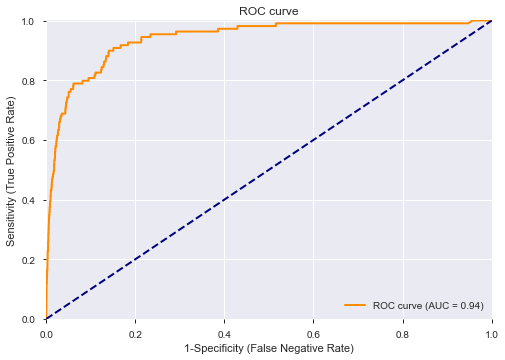

                                   Accuracy Random Forest: 0.8889367429340511
                   SENSITIVITY (aka RECALL) Random Forest: 0.8256880733944955
                 SPECIFICITY (aka FALL-OUT) Random Forest: 0.8893100833965125
 POSITIVE PREDICTIVE VALUE, (aka PRECISION) Random Forest: 0.04217432052483599
                 NEGATIVE PREDICTIVE VALUE) Random Forest: 0.9988443525333008


In [22]:
## Performance Measure

#Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion matrix Random Forest: \n" + str(cm_rf))

#Auc Calculation
auc_rf=roc_auc_score(y_test, y_pred_prob_rf)
print("\nAUC Random Forest: " +str(auc_rf))

#ROC plot
plot_roc(y_test, y_pred_prob_rf)

#Other Performance Metrics
print("                                   Accuracy Random Forest: " + str(custom_accuracy_score(y_test, y_pred_rf))) 
print("                   SENSITIVITY (aka RECALL) Random Forest: " + str(custom_sensitivity_score(y_test, y_pred_rf)))
print("                 SPECIFICITY (aka FALL-OUT) Random Forest: " + str(custom_specificity_score(y_test, y_pred_rf)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION) Random Forest: " + str(custom_ppv_score(y_test, y_pred_rf)))
print("                 NEGATIVE PREDICTIVE VALUE) Random Forest: " + str(custom_npv_score(y_test, y_pred_rf)))

In [23]:
from sklearn.metrics import classification_report
#class_names=[str(x) for x in classifier_RF.]
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     18466
           1       0.04      0.83      0.08       109

    accuracy                           0.89     18575
   macro avg       0.52      0.86      0.51     18575
weighted avg       0.99      0.89      0.94     18575



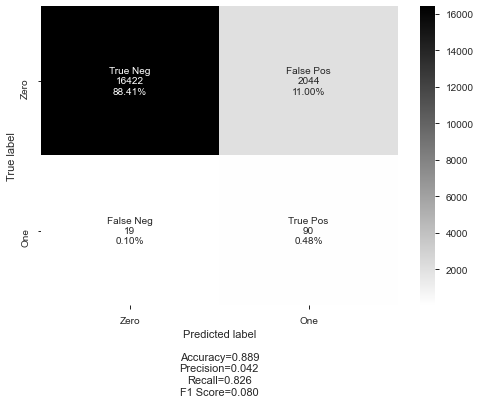

In [24]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Zero", "One"]
make_confusion_matrix(cm_rf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance Random Forest')

Text(0.5, 0, 'Decrease in Gini (recal, Gini = 2*AUC-1)')

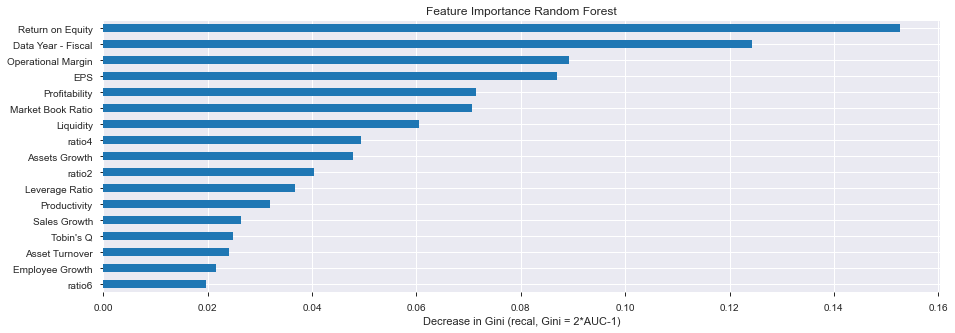

In [25]:
#Feature Importance - Using Random Forest Model
importances = grid_search_RF.best_estimator_.feature_importances_ 

#Plot the varibales according to their importance
plt.figure(figsize=(15,5))
plt.title('Feature Importance Random Forest')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(grid_search_RF.best_estimator_.feature_importances_ , index=X_train.columns)
feature_importances.nlargest(17).sort_values().plot(kind='barh', align='center')

In [26]:
#Grid Search with cross validation

#Score_func defines the performance measure with which the gridsearchCV should use
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# Create the parameter grid to test various hyper parameters
param_grid_logistic = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)}
    
#Define the Logistic model
logistic_model = LogisticRegression(solver='liblinear')

# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
#5-fold cross-validation
# Instantiate the grid search model
grid_search_logistic = GridSearchCV(estimator = logistic_model, param_grid = param_grid_logistic, 
                          cv = 5, scoring = score_func, n_jobs=-1,return_train_score = True, verbose = 2)

In [27]:
#Fitting the model to training data
grid_search_logistic = grid_search_logistic.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   43.1s finished
C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
#Finding out which are the best hyper parameter values where auc for the model is highest
print('\nBest Hyper-Parameter values Logistic:' + str(grid_search_logistic.best_params_)) 
grid_search_logistic.best_params_

#Best Estimator for Logistic Model
best_grid_logistic = grid_search_logistic.best_estimator_
best_grid_logistic

#Viweing the best score of the model
best_result_logistic = grid_search_logistic.best_score_
print("\nBest Score Logistic: "+str(best_result_logistic))


Best Hyper-Parameter values Logistic:{'C': 10000.0, 'penalty': 'l2'}


{'C': 10000.0, 'penalty': 'l2'}

LogisticRegression(C=10000.0, solver='liblinear')


Best Score Logistic: 0.747191011235955


In [29]:
#Using the above (best) model with the best hyper parameter values to predict the testing data
class_threshold=0.50
y_pred_prob_logistic = grid_search_logistic.predict_proba(X_test)[:,1] # probabilities
y_pred_logistic = np.where(y_pred_prob_logistic > class_threshold, 1, 0) # classification


Confusion matrix Logistic: 
[[14008  4458]
 [   25    84]]

AUC Logistic:  0.810804284988926


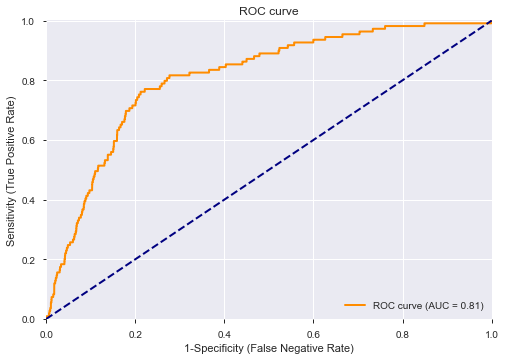

                                   Accuracy Logistic: 0.7586541049798116
                   SENSITIVITY (aka RECALL) Logistic: 0.7706422018348624
                 SPECIFICITY (aka FALL-OUT) Logistic: 0.7585833423589299
 POSITIVE PREDICTIVE VALUE, (aka PRECISION) Logistic: 0.018494055482166448
                 NEGATIVE PREDICTIVE VALUE) Logistic: 0.9982184849996437


In [30]:
## Performance Measures
#Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print("\nConfusion matrix Logistic: \n" + str(cm_logistic))

#Auc Calculation
auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)
print("\nAUC Logistic:  " + str(auc_logistic))

#ROC plot
plot_roc(y_test, y_pred_prob_logistic)

#Other Performance Metrics
print("                                   Accuracy Logistic: " + str(custom_accuracy_score(y_test, y_pred_logistic))) 
print("                   SENSITIVITY (aka RECALL) Logistic: " + str(custom_sensitivity_score(y_test, y_pred_logistic)))
print("                 SPECIFICITY (aka FALL-OUT) Logistic: " + str(custom_specificity_score(y_test, y_pred_logistic)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION) Logistic: " + str(custom_ppv_score(y_test, y_pred_logistic)))
print("                 NEGATIVE PREDICTIVE VALUE) Logistic: " + str(custom_npv_score(y_test, y_pred_logistic)))

In [31]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     18466
           1       0.02      0.77      0.04       109

    accuracy                           0.76     18575
   macro avg       0.51      0.76      0.45     18575
weighted avg       0.99      0.76      0.86     18575



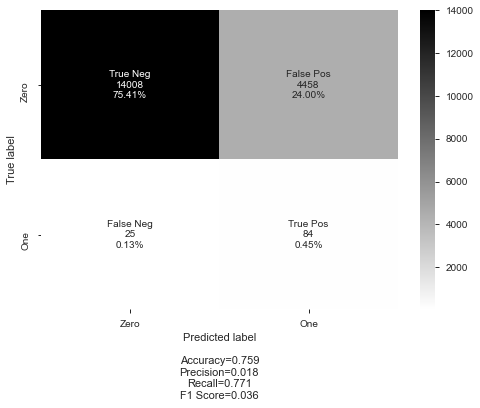

In [32]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Zero", "One"]
make_confusion_matrix(cm_logistic, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [34]:
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.datasets import load_credit

classes = ['0', '1']

visualizer = ClassPredictionError(
    best_grid_logistic(n_estimators=10), classes=classes
)

visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

TypeError: 'LogisticRegression' object is not callable

C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   39.0s finished
C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   33.3s finished
C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   32.2s finished
C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   39.7s finished
C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   38.2s finished
C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   33.8s finished
C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.5s


KeyboardInterrupt: 

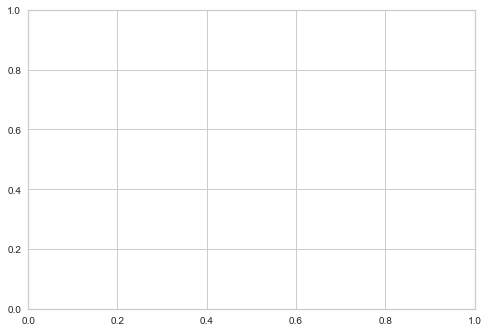

In [37]:

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.datasets import load_spam

visualizer = DiscriminationThreshold(grid_search_logistic)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure